In [1]:
import pandas as pd
import nltk
from nltk import FreqDist
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dislike = pd.read_excel('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/dislike.xlsx')


In [3]:
column_name = dislike.columns[0]
dislike.rename({column_name:'dislike_review'},axis=1,inplace=True)


In [4]:
data_clean = dislike

In [5]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


# Let's take a look at the updated text
data_clean['dislike_review'] = data_clean['dislike_review'].apply(clean_text_round1)

<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<ipython-input-5-ebe69e897d78>:8: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
<ipython-input-5-ebe69e897d78>:10: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [6]:
#Remove stop words
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_add = 'interesting,good,physics,article,articles,issue'.split(',')
for i in range(len(stop_add)):
    stop_words.append(stop_add[i])
data_clean['reviews_without_stopwords'] = data_clean['dislike_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data_clean.head()
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
#Lemmatize data
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
def to_string(df):
    return ' '.join(df)

data_clean['text_lemmatized'] = data_clean.reviews_without_stopwords.apply(lemmatize_text)
data_clean['text_lemmatized'] = data_clean['text_lemmatized'].map(to_string)

data_clean.head()
data_clean['text_lemmatized'] = data_clean['text_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


data_clean.to_csv('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/dataset/dislike_data_clean.csv',index=False)

In [8]:
data_clean = pd.read_csv('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/dataset/dislike_data_clean.csv')
data_clean

,dislike_review,reviews_without_stopwords,text_lemmatized
0,articles seem to have become less technical lately,seem become less technical lately,seem become le technical lately
1,it rarelynever covers topics relevant to my career,rarelynever covers topics relevant career,rarelynever cover topic relevant career
2,more science and science history less on personalities more news from public universities vs the elite eastwest coast private schools which dominate the newspeople highlighted in physics today is...,science science history less personalities news public universities vs elite eastwest coast private schools dominate newspeople highlighted today issues part public universities bulk science educa...,science science history le personality news public university v elite eastwest coast private school dominate newspeople highlighted today part public university bulk science education halo effect
3,i like it just fine,like fine,like fine
4,cant really think of anything,cant really think anything,cant really think anything
5,not much i really enjoy physics today,much really enjoy today,much really enjoy today
6,some articles are just too long,long,long
7,there are a few articles i really enjoy but not the rest,really enjoy rest,really enjoy rest
8,nothing really there is an occasional issue that i dont find particularly interesting,nothing really occasional dont find particularly,nothing really occasional dont find particularly
9,print too small as i get older also i feel like women are rarely seen or written about in the articles,print small get older also feel like women rarely seen written,print small get older also feel like woman rarely seen written


In [9]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [10]:
data_clean['text_lemmatized']=data_clean['text_lemmatized'].fillna('nan')
list_a = [text for text in data_clean['text_lemmatized']]
all_words = ' '.join(list_a)
all_words = all_words.split()

fdist = FreqDist(all_words)
fdist

FreqDist({'time': 31, 'technical': 29, 'much': 27, 'read': 27, 'long': 24, 'political': 24, 'dont': 22, 'science': 19, 'like': 18, 'nothing': 18, ...})

In [11]:
fdist_dict = dict(fdist)
freq_df = pd.DataFrame(fdist_dict.items(), columns=['Date', 'DateValue'])
freq_df.sort_values('DateValue',ascending=False).head()
#freq_df.to_csv('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/final result for NLP 2/dislike_freq_df.csv')

,Date,DateValue
78,time,31
3,technical,29
79,read,27
37,much,27
204,political,24


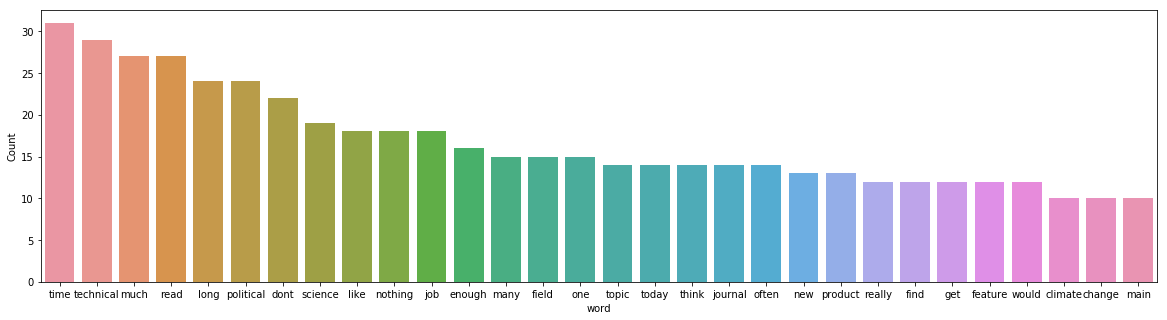

In [12]:
freq_words(data_clean['text_lemmatized'])

In [13]:
# remove stopwords from the text
reviews = [r for r in data_clean['text_lemmatized']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]


In [14]:
#!python -m spacy download en # one time run


In [15]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [16]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['rarelynever', 'cover', 'topic', 'relevant', 'career']


In [17]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['rarelynever', 'cover', 'topic', 'relevant', 'career']


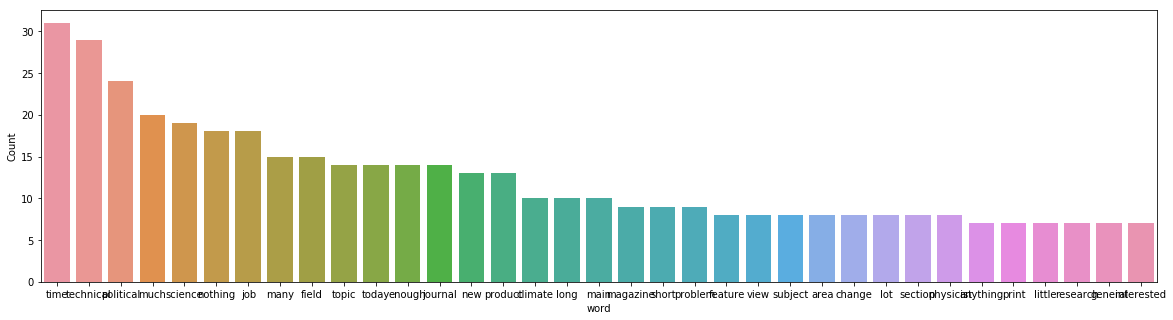

<Figure size 432x288 with 0 Axes>

In [18]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

data_clean['text_lemmatized2'] = reviews_3

freq_words(data_clean['text_lemmatized2'], 35)
plt.tight_layout()

## Building an LDA model


In [19]:
dictionary = corpora.Dictionary(reviews_2)

In [20]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]


In [21]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50)

In [22]:
lda_model.print_topics()

[(0,
  '0.062*"political" + 0.028*"much" + 0.017*"fact" + 0.017*"general" + 0.017*"bias" + 0.017*"view" + 0.017*"occasional" + 0.016*"topic" + 0.013*"time" + 0.012*"knowledge"'),
 (1,
  '0.136*"time" + 0.040*"technical" + 0.035*"main" + 0.030*"journal" + 0.030*"enough" + 0.029*"long" + 0.017*"many" + 0.015*"topic" + 0.010*"today" + 0.010*"author"'),
 (2,
  '0.025*"today" + 0.025*"fine" + 0.019*"dislike" + 0.019*"lack" + 0.019*"review" + 0.019*"ad" + 0.019*"product" + 0.018*"advertisement" + 0.013*"background" + 0.013*"high"'),
 (3,
  '0.027*"field" + 0.019*"research" + 0.016*"lot" + 0.016*"change" + 0.016*"political" + 0.016*"topic" + 0.016*"subject" + 0.016*"particular" + 0.015*"climate" + 0.015*"many"'),
 (4,
  '0.053*"product" + 0.052*"new" + 0.027*"political" + 0.026*"section" + 0.022*"relevant" + 0.017*"science" + 0.016*"field" + 0.016*"thing" + 0.011*"technical" + 0.011*"interested"'),
 (5,
  '0.027*"science" + 0.023*"anything" + 0.023*"journal" + 0.019*"magazine" + 0.019*"featur

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Users/reggieyang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.050548 -0.023006       1        1  14.170405
5     -0.067320  0.088610       2        1  11.625586
9      0.050318 -0.065871       3        1  11.549211
8      0.016184  0.156927       4        1  10.919358
7      0.038599 -0.069798       5        1  10.169531
1     -0.193681 -0.029675       6        1  10.072941
4      0.099915  0.017261       7        1   9.189678
0      0.037323 -0.098076       8        1   8.533843
2      0.037098  0.079331       9        1   7.374809
6     -0.068984 -0.055701      10        1   6.394644, topic_info=    Category       Freq         Term      Total  loglift  logprob
52   Default  21.000000         time  21.000000  30.0000  30.0000
0    Default  19.000000    technical  19.000000  29.0000  29.0000
26   Default  13.000000      nothing  13.000000  28.0000  28.0000
140  Default  17.000000    political  17.000000  27.0000  27.0000
79   Default   9.000000      product   9.000000  26.0000  26.0000
77   Default   9.000000          new   9.000000  25.0000  25.0000
94   Default  14.000000         much  14.000000  24.0000  24.0000
121  Default  10.000000      journal  10.000000  23.0000  23.0000
72   Default   6.000000        short   6.000000  22.0000  22.0000
209  Default   7.000000         main   7.000000  21.0000  21.0000
78   Default   4.000000  opportunity   4.000000  20.0000  20.0000
76   Default  13.000000          job  13.000000  19.0000  19.0000
128  Default   6.000000      section   6.000000  18.0000  18.0000
19   Default  13.000000      science  13.000000  17.0000  17.0000
46   Default   7.000000         long   7.000000  16.0000  16.0000
23   Default   3.000000         fine   3.000000  15.0000  15.0000
24   Default   5.000000     anything   5.000000  14.0000  14.0000
273  Default   3.000000           ad   3.000000  13.0000  13.0000
344  Default   5.000000     obituary   5.000000  12.0000  12.0000
5    Default  10.000000        topic  10.000000  11.0000  11.0000
4    Default   4.000000     relevant   4.000000  10.0000  10.0000
38   Default  10.000000       enough  10.000000   9.0000   9.0000
152  Default   6.000000    physicist   6.000000   8.0000   8.0000
89   Default   3.000000       format   3.000000   7.0000   7.0000
93   Default   3.000000        focus   3.000000   6.0000   6.0000
124  Default   7.000000      problem   7.000000   5.0000   5.0000
232  Default   4.000000      dislike   4.000000   4.0000   4.0000
31   Default   4.000000        small   4.000000   3.0000   3.0000
165  Default   4.000000        paper   4.000000   2.0000   2.0000
61   Default  11.000000        field  11.000000   1.0000   1.0000
..       ...        ...          ...        ...      ...      ...
573  Topic10   0.664558  cooperation   1.288395   2.0877  -4.8960
574  Topic10   0.664558  possibility   1.288395   2.0877  -4.8960
575  Topic10   0.664558      project   1.288395   2.0877  -4.8960
592  Topic10   0.664553    necessary   1.288390   2.0877  -4.8960
96   Topic10   0.664553        jazzy   1.288390   2.0877  -4.8960
74   Topic10   0.664553         type   1.288390   2.0877  -4.8960
553  Topic10   0.664540        event   1.288378   2.0877  -4.8960
137  Topic10   1.268380  theoretical   2.582850   2.0386  -4.2496
366  Topic10   1.268361      reading   2.582865   2.0385  -4.2496
72   Topic10   3.080958        short   6.588950   1.9896  -3.3621
0    Topic10   8.986076    technical  19.590265   1.9704  -2.2917
409  Topic10   1.268738         line   3.362310   1.7751  -4.2493
273  Topic10   1.266148           ad   3.739284   1.6668  -4.2514
152  Topic10   1.110924    physicist   6.159177   1.0370  -4.3822
5    Topic10   1.268711        topic  10.419613   0.6440  -4.2493
201  Topic10   0.787718     emphasis   3.344613   1.3037  -4.7260
77   Topic10   0.755158          new   9.492966   0.2183  -4.7682
94   Topic10   0.702721         much  14.543168  -0.2802  -4.8401
63   Topi

In [24]:
lda_model

In [25]:
corpus_transformed = lda_model[doc_term_matrix]


In [26]:
from operator import itemgetter
score_list = []
for topic in corpus_transformed:
        score_list.append(max(topic,key=itemgetter(1)))

In [27]:
data_clean['topic_score'] = score_list

In [28]:
data_clean

,dislike_review,reviews_without_stopwords,text_lemmatized,text_lemmatized2,topic_score
0,articles seem to have become less technical lately,seem become less technical lately,seem become le technical lately,technical,"(6, 0.54998523)"
1,it rarelynever covers topics relevant to my career,rarelynever covers topics relevant career,rarelynever cover topic relevant career,rarelynever cover topic relevant career,"(3, 0.8499745)"
2,more science and science history less on personalities more news from public universities vs the elite eastwest coast private schools which dominate the newspeople highlighted in physics today is...,science science history less personalities news public universities vs elite eastwest coast private schools dominate newspeople highlighted today issues part public universities bulk science educa...,science science history le personality news public university v elite eastwest coast private school dominate newspeople highlighted today part public university bulk science education halo effect,science science history personality news public university v eastw coast private school dominate today public university bulk science education halo effect,"(5, 0.95908755)"
3,i like it just fine,like fine,like fine,fine,"(2, 0.54999715)"
4,cant really think of anything,cant really think anything,cant really think anything,anything,"(5, 0.54999)"
5,not much i really enjoy physics today,much really enjoy today,much really enjoy today,today,"(2, 0.5499597)"
6,some articles are just too long,long,long,,"(0, 0.1)"
7,there are a few articles i really enjoy but not the rest,really enjoy rest,really enjoy rest,rest,"(4, 0.54998195)"
8,nothing really there is an occasional issue that i dont find particularly interesting,nothing really occasional dont find particularly,nothing really occasional dont find particularly,nothing occasional,"(8, 0.3666717)"
9,print too small as i get older also i feel like women are rarely seen or written about in the articles,print small get older also feel like women rarely seen written,print small get older also feel like woman rarely seen written,print small get old woman,"(8, 0.84998155)"


In [30]:
#count each topic
def extract_topic(df):
        return df[0]
data_clean['topic'] = data_clean['topic_score'].apply(extract_topic)

#add column with topic content
def add_content(df):
        return lda_model.print_topics()[int(df)]
data_clean['topic_content'] = data_clean['topic'].apply(add_content)

In [31]:
final_dislike_data = data_clean[['dislike_review','topic_score','topic','topic_content']]
final_dislike_data.head()

,dislike_review,topic_score,topic,topic_content
0,articles seem to have become less technical lately,"(6, 0.54998523)",6,"(6, 0.101*""technical"" + 0.035*""short"" + 0.021*""format"" + 0.014*""line"" + 0.014*""peripheral"" + 0.014*""prefer"" + 0.014*""topic"" + 0.014*""theoretical"" + 0.014*""reading"" + 0.014*""ad"")"
1,it rarelynever covers topics relevant to my career,"(3, 0.8499745)",3,"(3, 0.027*""field"" + 0.019*""research"" + 0.016*""lot"" + 0.016*""change"" + 0.016*""political"" + 0.016*""topic"" + 0.016*""subject"" + 0.016*""particular"" + 0.015*""climate"" + 0.015*""many"")"
2,more science and science history less on personalities more news from public universities vs the elite eastwest coast private schools which dominate the newspeople highlighted in physics today is...,"(5, 0.95908755)",5,"(5, 0.027*""science"" + 0.023*""anything"" + 0.023*""journal"" + 0.019*""magazine"" + 0.019*""feature"" + 0.019*""problem"" + 0.014*""work"" + 0.014*""woman"" + 0.014*""year"" + 0.014*""photo"")"
3,i like it just fine,"(2, 0.54999715)",2,"(2, 0.025*""today"" + 0.025*""fine"" + 0.019*""dislike"" + 0.019*""lack"" + 0.019*""review"" + 0.019*""ad"" + 0.019*""product"" + 0.018*""advertisement"" + 0.013*""background"" + 0.013*""high"")"
4,cant really think of anything,"(5, 0.54999)",5,"(5, 0.027*""science"" + 0.023*""anything"" + 0.023*""journal"" + 0.019*""magazine"" + 0.019*""feature"" + 0.019*""problem"" + 0.014*""work"" + 0.014*""woman"" + 0.014*""year"" + 0.014*""photo"")"


In [33]:
dict(final_dislike_data['topic'].value_counts())

{8: 39, 2: 34, 1: 33, 7: 32, 0: 32, 3: 31, 9: 29, 4: 28, 6: 25, 5: 24}

In [ ]:
#final_dislike_data.to_excel('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/final report/dislike_result.xlsx')